In [1]:
# Data Preparation

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [3]:
dTrain = pd.read_csv('assets/train.csv')
dEval = pd.read_csv('assets/train.csv')

oTrain = dTrain.pop('survived')
oEval = dEval.pop('survived')

In [4]:
dTrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [5]:
dTrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [6]:
dTrain.shape

(627, 9)

In [7]:
oTrain.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

Text(0.5, 0, 'Age')

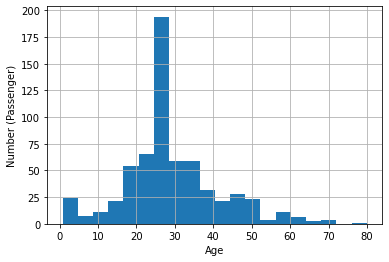

In [8]:
ageHist = dTrain.age.hist(bins=20)
ageHist.set_ylabel('Number (Passenger)')
ageHist.set_xlabel('Age')

Text(0, 0.5, 'Number (Passenger)')

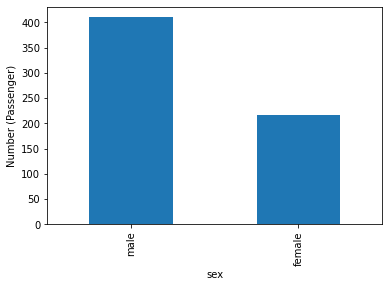

In [9]:
sexDist = dTrain['sex'].value_counts().plot(kind='bar')
sexDist.set_xlabel('sex')
sexDist.set_ylabel('Number (Passenger)')

Text(0.5, 0, 'Class')

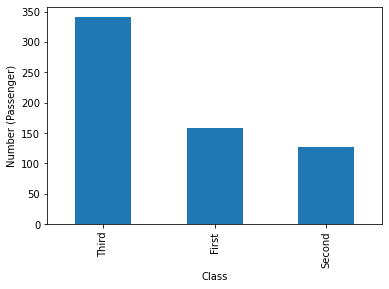

In [10]:
classDist = dTrain['class'].value_counts().plot(kind='bar')
classDist.set_ylabel('Number (Passenger)')
classDist.set_xlabel('Class')

In [11]:
dTrain.head()


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [12]:
oTrain.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

Text(0, 0.5, '% survive')

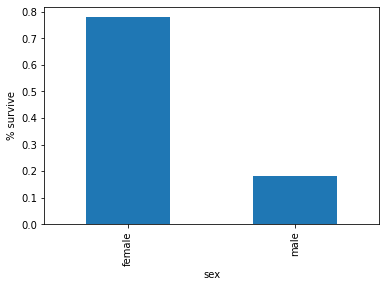

In [13]:
survivedBySex = pd.concat([dTrain, oTrain], axis = 1).groupby('sex')
survivedBySex.survived.mean().plot(kind = 'bar').set_ylabel('% survive')

Text(0, 0.5, '% survive')

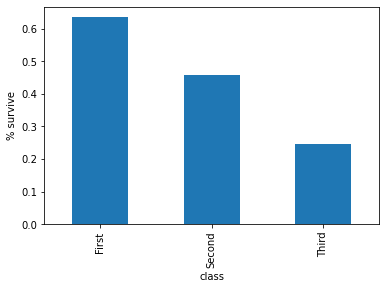

In [14]:
survivedByClass = pd.concat([dTrain, oTrain], axis = 1).groupby('class')
survivedByClass.survived.mean().plot(kind = 'bar').set_ylabel('% survive')

Text(0, 0.5, '% survive')

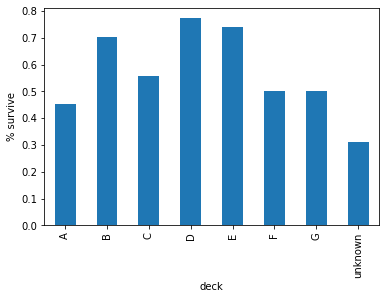

In [15]:
survivedByDeck = pd.concat([dTrain, oTrain], axis = 1).groupby('deck')
survivedByDeck.survived.mean().plot(kind = 'bar').set_ylabel('% survive')

Text(0, 0.5, '% survive')

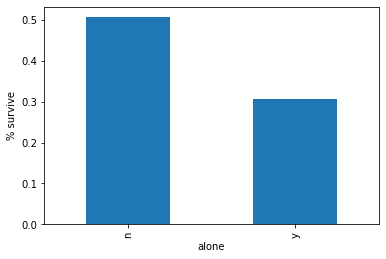

In [16]:
survivedByIfAlone = pd.concat([dTrain, oTrain], axis = 1).groupby('alone')
survivedByIfAlone.survived.mean().plot(kind = 'bar').set_ylabel('% survive')

Text(0, 0.5, '% survive')

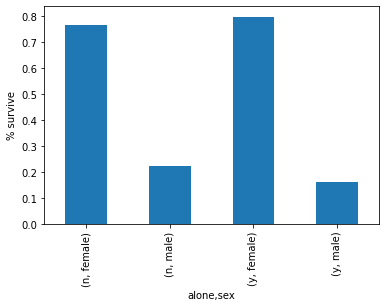

In [17]:
survivedByIfAloneWithSex = pd.concat([dTrain, oTrain], axis = 1).groupby(['alone', 'sex'])
survivedByIfAloneWithSex.survived.mean().plot(kind = 'bar').set_ylabel('% survive')

In [18]:
# Analiyzing Data:

# Majority of passengers are in their 20's or 30's.
# Majority of passenger are male.
# Female passengers has dramatic survival rate.
# While alone females have slightly more survival rate than those of not alone, the situation is opposite for male passengers 

In [19]:
### Feature Sets/Columns
# Rerepresantation of caterogical data, which are non-numeric.

caterogicalData = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']

numericData = ['age', 'fare']

featureMap = []

for features in caterogicalData:
    uniqueSet = dTrain[features].unique() # similar to STL set / unordered_set. Stores unique values.
    featureMap.append(tf.feature_column.categorical_column_with_vocabulary_list(features, uniqueSet))
    # TensorFlow syntax
    # tf.feature_column.categorical_column_with_vocabulary_list(features, uniqueSet)    
for features in numericData:
    featureMap.append(tf.feature_column.numeric_column(features, dtype = tf.float32))
    # TensorFlow syntax
    # tf.feature_column.numeric_column
print(featureMap)    

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [20]:
uniqueTowns = dTrain['embark_town'].unique() # Extracting unique values.
print(uniqueTowns)    

['Southampton' 'Cherbourg' 'Queenstown' 'unknown']


In [21]:
# Training Process

# Feeding with small "batches" of "epochs".
# Example, feeding with 32 data by 10 times each. batches= 32, epochs = 10

In [22]:
# Input Function

def makeInput(dataTrain, labelTrain, noEpoch = 10, mixer = True, batchSize = 32):
    def inputFunction():
        # creating tf.data.Dataset by data and its label.
        data = tf.data.Dataset.from_tensor_slices((dict(dataTrain), labelTrain))
        if mixer:
            data = data.shuffle(1000)
        # Splitting the dataset into baches and repeating with epocs
        data = data.batch(batchSize).repeat(noEpoch)
        return data
    return inputFunction   

In [23]:
# Creating dataset with input function

# recall : dTrain is the raw data where survived info popped out into oTrain.
# dEval = dTrain and oEval = oTrain.

trainMe = makeInput(dTrain, oTrain)
evaluateMe = makeInput(dEval, oEval, noEpoch=1, mixer=False)

In [24]:
# Creating Model with linear estimator (Lin. Regression) 
# ---> .estimator.LinearClassifier()
# .estimator has three Linear- attributes: LinearClassifier(), LinearEstimator(), LinearRegressor()

linearEst = tf.estimator.LinearClassifier(feature_columns=featureMap)

# Training the model

linearEst.train(trainMe)
result = linearEst.evaluate(evaluateMe) # Assesment of model

clear_output()
print(result)
print("\n##########################\n")
print(result['accuracy'])


{'accuracy': 0.80861247, 'accuracy_baseline': 0.61244017, 'auc': 0.8660998, 'auc_precision_recall': 0.82825345, 'average_loss': 0.43756464, 'label/mean': 0.3875598, 'loss': 0.43548983, 'precision': 0.75949365, 'prediction/mean': 0.3938331, 'recall': 0.7407407, 'global_step': 200}

##########################

0.80861247


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\oezen\AppData\Local\Temp\tmpb5tdkpnh\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.

info about person:
 sex                        female
age                          26.0
n_siblings_spouses              0
parch                           0
fare                        7.925
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 2, dtype: object

Real Info, survived or not:
 1

prediction from the model:
 0.5988453


<AxesSubplot:title={'center':'Prediction (Probabilities)'}, ylabel='Frequency'>

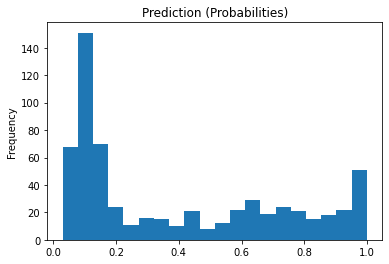

In [25]:
# Using .predict() to get probabilities from the model.

dictPre = list(linearEst.predict(evaluateMe)) 
probs = pd.Series([pre['probabilities'][1] for pre in dictPre])

print('\ninfo about person:\n',dEval.loc[2]) # info about person
print('\nReal Info, survived or not:\n',oEval.loc[2]) # Real Info, survived or not
print('\nprediction from the model:\n',dictPre[2]['probabilities'][1]) # prediction from the model.

probs.plot(kind='hist', bins=20, title='Prediction (Probabilities)')